# Importing

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression

Use to plot the data

In [2]:
import matplotlib.pyplot as plt


Use to make data look better

In [3]:
from matplotlib import style

Use to specify the style of the plot

In [4]:
style.use('ggplot')

In [5]:
import joblib

# Selecting Files

In [6]:
file_path = r'D:\ImportanFiles\Coding Related\Repositories\Machine Learning project related\Project 2\Data\603300_utf-8.csv'
stock_df = pd.read_csv(file_path)

# Calculating nessasary indexes
and add them to the stock_df dataframe

In [7]:
stock_df['HL_PCT'] = (stock_df['Highest Price'] - stock_df['Closing Price']) / stock_df['Closing Price'] * 100.0
stock_df['PCT_change'] = (stock_df['Closing Price'] - stock_df['Opening Price']) / stock_df['Opening Price'] * 100.0
display(stock_df.head())

,Stock Code,Stock Name,Trading Time,Opening Price,Highest Price,Lowest Price,Closing Price,Price Change,Price Change Percentage,Trading Volume,Trading Amount,HL_PCT,PCT_change
0,603300,????,2015-05-29,2.12,2.12,2.12,2.12,--,--,"13,700","162,208",0.0,0.0
1,603300,????,2015-06-01,2.33,2.33,2.33,2.33,0.2110,9.9660,"5,700","74,214",0.0,0.0
2,603300,????,2015-06-02,2.56,2.56,2.56,2.56,0.2324,9.9820,"3,400","48,688",0.0,0.0
3,603300,????,2015-06-03,2.82,2.82,2.82,2.82,0.2558,9.9898,"13,300","209,475",0.0,0.0
4,603300,????,2015-06-04,3.10,3.10,3.10,3.10,0.2825,10.0305,"9,700","168,101",0.0,0.0


# Change the trading time into pandas datetime data type.

In [8]:
stock_df['Trading Time'] = pd.to_datetime(stock_df['Trading Time'])
print(stock_df['Trading Time'].dtype)

datetime64[ns]


# Choose data columns we want and drop the rest

In [9]:
stock_df = stock_df[['Trading Time', 'Closing Price', 'HL_PCT', 'PCT_change', 'Trading Volume']]
display(stock_df.head())

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume
0,2015-05-29,2.12,0.0,0.0,"13,700"
1,2015-06-01,2.33,0.0,0.0,"5,700"
2,2015-06-02,2.56,0.0,0.0,"3,400"
3,2015-06-03,2.82,0.0,0.0,"13,300"
4,2015-06-04,3.10,0.0,0.0,"9,700"


Remove commas and convert to numeric, since in metadata the trading volume contain commas

In [10]:
stock_df['Trading Volume'] = stock_df['Trading Volume'].replace({',': ''}, regex=True).astype(float)
display(stock_df.head())

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume
0,2015-05-29,2.12,0.0,0.0,13700.0
1,2015-06-01,2.33,0.0,0.0,5700.0
2,2015-06-02,2.56,0.0,0.0,3400.0
3,2015-06-03,2.82,0.0,0.0,13300.0
4,2015-06-04,3.10,0.0,0.0,9700.0


# Setting up a name for target column attribute

In [11]:
forecast_col = 'Closing Price'

# Tell the code how many days ahead will it be forcasting

In [12]:
forecast_out = int(math.ceil(0.001*len(stock_df)))
print(len(stock_df), forecast_out)
# The 0.001 percentage of the data is 7 days, so we are predicting the closing price for the 7 days later

2347 3


# Managing the answers
The answer is the closing price 7(forcast_out) days later.

We then shift the data's targeted attributes up for 7 days and assign them into the 'Label' column.

In [13]:
stock_df['Label'] = stock_df[forecast_col].shift(-forecast_out)
print(forecast_out)
display(stock_df.tail(10))

3


,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume,Label
2337,2025-02-17,8.00,7.250000,-6.759907,505246495.0,9.07
2338,2025-02-18,8.80,0.000000,14.285714,669145270.0,9.98
2339,2025-02-19,9.07,4.630650,-0.329670,631089223.0,10.50
2340,2025-02-20,9.07,8.930540,0.331858,495482881.0,10.00
2341,2025-02-21,9.98,0.000000,8.008658,449182206.0,10.43
2342,2025-02-24,10.50,4.571429,6.167846,590193231.0,11.03
2343,2025-02-25,10.00,6.000000,2.459016,414005331.0,9.99
2344,2025-02-26,10.43,5.273250,-0.666667,440843503.0,NaN
2345,2025-02-27,11.03,2.175884,8.992095,482724475.0,NaN
2346,2025-02-28,9.99,6.806807,-5.754717,456895504.0,NaN


# Spliting and Managing the features

Split the dataframe where X is the features and y is the answer

1. Remove answer(label) from X which is the features
2. Scale the features.
3. Store remoced answers into y
4. drop NaN values created by the shifting, since shift up will create a 7 days of label section NaN values, so make sure to drop these when you create 'Label' column. 
5. By doing these following two blocks, you split the original data into 4 parts: 

   1. (original days - forcast_out days)'s data without answers: `X`
   2. (original days - forcast_out days)'s answers without data: `y`
   3. (forcast_out days)'s data without answers: `X_lately`
stock_df.dropna(inplace = True)
   1. (forcast_out days)'s answers which are NaN values because of the shifting, and is removed by the `stock_df.dropna(inplace = True)` line following.

In [14]:
dates = stock_df['Trading Time'][:-forecast_out]
dates_lately = stock_df['Trading Time'][-forecast_out:]

display(dates)
display(dates_lately)

0      2015-05-29
1      2015-06-01
2      2015-06-02
3      2015-06-03
4      2015-06-04
          ...    
2339   2025-02-19
2340   2025-02-20
2341   2025-02-21
2342   2025-02-24
2343   2025-02-25
Name: Trading Time, Length: 2344, dtype: datetime64[ns]

2344   2025-02-26
2345   2025-02-27
2346   2025-02-28
Name: Trading Time, dtype: datetime64[ns]

In [15]:
X = np.array(stock_df.drop(['Label', 'Trading Time'], axis = 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

display(X)
display(X_lately)
display(stock_df.tail(10))

array([[-1.59114831, -1.00810594, -0.0488493 , -0.39227954],
       [-1.45333066, -1.00810594, -0.0488493 , -0.39246151],
       [-1.30238753, -1.00810594, -0.0488493 , -0.39251382],
       ...,
       [ 3.56716933, -1.00810594,  2.63275563,  9.82455585],
       [ 3.90843207,  1.20304775,  2.01638149, 13.03200787],
       [ 3.58029482,  1.89403327,  0.77452342,  9.02441885]],
      shape=(2344, 4))

array([[ 3.56716933, -1.00810594,  2.63275563,  9.82455585],
       [ 3.90843207,  1.20304775,  2.01638149, 13.03200787],
       [ 3.58029482,  1.89403327,  0.77452342,  9.02441885]])

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume,Label
2337,2025-02-17,8.00,7.250000,-6.759907,505246495.0,9.07
2338,2025-02-18,8.80,0.000000,14.285714,669145270.0,9.98
2339,2025-02-19,9.07,4.630650,-0.329670,631089223.0,10.50
2340,2025-02-20,9.07,8.930540,0.331858,495482881.0,10.00
2341,2025-02-21,9.98,0.000000,8.008658,449182206.0,10.43
2342,2025-02-24,10.50,4.571429,6.167846,590193231.0,11.03
2343,2025-02-25,10.00,6.000000,2.459016,414005331.0,9.99
2344,2025-02-26,10.43,5.273250,-0.666667,440843503.0,NaN
2345,2025-02-27,11.03,2.175884,8.992095,482724475.0,NaN
2346,2025-02-28,9.99,6.806807,-5.754717,456895504.0,NaN


## Removing NaN values caused by the shifting

In [16]:
stock_df.dropna(inplace = True)

In [17]:
y = np.array(stock_df['Label'])
display(y)
display(stock_df.tail(10))

array([ 2.82,  3.1 ,  3.41, ..., 10.43, 11.03,  9.99], shape=(2344,))

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume,Label
2334,2025-02-12,8.14,2.334152,1.750000,714707604.0,8.00
2335,2025-02-13,8.95,0.000000,5.791962,644307479.0,8.80
2336,2025-02-14,8.53,4.337632,0.235018,522612008.0,9.07
2337,2025-02-17,8.00,7.250000,-6.759907,505246495.0,9.07
2338,2025-02-18,8.80,0.000000,14.285714,669145270.0,9.98
2339,2025-02-19,9.07,4.630650,-0.329670,631089223.0,10.50
2340,2025-02-20,9.07,8.930540,0.331858,495482881.0,10.00
2341,2025-02-21,9.98,0.000000,8.008658,449182206.0,10.43
2342,2025-02-24,10.50,4.571429,6.167846,590193231.0,11.03
2343,2025-02-25,10.00,6.000000,2.459016,414005331.0,9.99


You can see they have the same shape in axis = 1.

# Split data into traning and testing.

Set shuffle = False because by default it will shuffle and this will mess up the date relationships which is something we want

In [18]:
X_train, X_test, y_train, y_test, dates_train, dates_test = model_selection.train_test_split(X, y, dates, test_size = 0.2)

# Training the model(classifier)
`n_jobs = -1` means to run using as many threads as possible, make it faster.

In [19]:
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

# Saving the model
And load the model:

In [20]:
joblib.dump(clf, 'stock_prediction_model.pkl')
loaded_model = joblib.load('stock_prediction_model.pkl')

Store the loaded model into clf for education purposes

In [21]:
clf = loaded_model

# Getting the prediction for the shifted days that has no answers.
And print the result:

In [22]:
forecast_set = clf.predict(X_lately)
print("Forecast result: " + str(forecast_set) + "\n" + "With the accuracy of: " + str(accuracy) + "\n" + "Forecast out of " + str(forecast_out) + " days.")

Forecast result: [10.36892536 11.00327351 10.31134466]
With the accuracy of: 0.9525875235197545
Forecast out of 3 days.


# Merging all sections together for matplot lib

1. dates_train
2. dates_test
3. dates_lately

This being the X axis

and


1. y_train
2. y_test
3. forcast out

This being the Y axis

In [23]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
forecast_set = forecast_set.reshape(-1, 1)

dates_train = np.array(dates_train).reshape(-1, 1)
dates_test  = np.array(dates_test).reshape(-1, 1)
dates_lately = np.array(dates_lately).reshape(-1, 1)

all_dates = np.vstack((dates_train, dates_test, dates_lately)).flatten()
all_targets = np.vstack((y_train, y_test, forecast_set)).flatten()

df_combined = pd.DataFrame({
    "Date": all_dates,
    "Closing Price": all_targets
})

df_combined.set_index('Date', inplace = True)
df_combined.sort_values(by = 'Date', inplace = True)
display(df_combined)


,Closing Price
Date,
2015-05-29,2.820000
2015-06-01,3.100000
2015-06-02,3.410000
2015-06-03,3.750000
2015-06-04,4.130000
...,...
2025-02-24,11.030000
2025-02-25,9.990000
2025-02-26,10.368925


## Using matplotlib to Show the graph

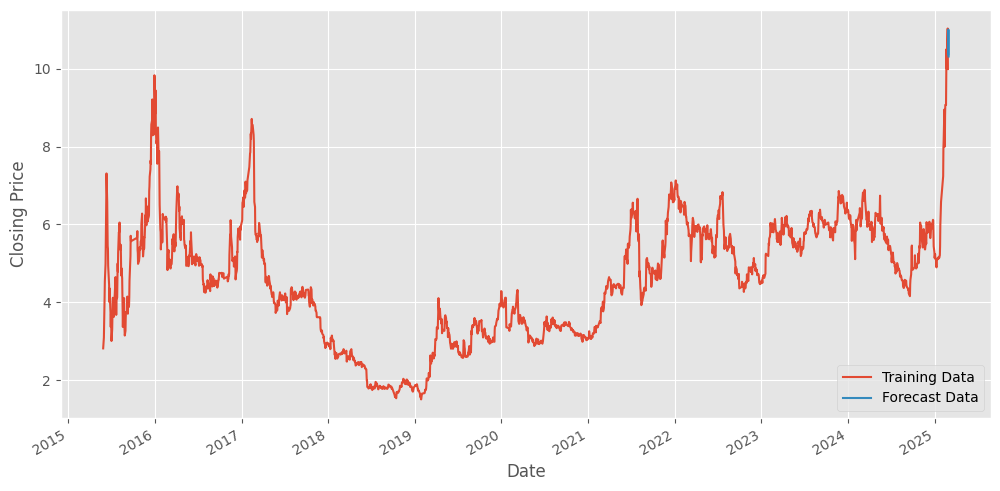

In [24]:
plt.figure(figsize = (12, 6))
df_combined['Closing Price'][:-forecast_out].plot(label = 'Training Data')
df_combined['Closing Price'][-forecast_out:].plot(label = 'Forecast Data')
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [25]:
df_combined.info()
df_combined.columns
df_combined.describe()
df_combined.sort_values(by = 'Closing Price', ascending = False)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2015-05-29 to 2025-02-28
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  2347 non-null   float64
dtypes: float64(1)
memory usage: 36.7 KB


,Closing Price
Date,
2025-02-24,11.030000
2025-02-27,11.003274
2025-02-19,10.500000
2025-02-21,10.430000
2025-02-26,10.368925
...,...
2019-01-24,1.580000
2018-10-10,1.570000
2019-01-29,1.560000
